In [1]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
import math
import numpy as np


In [2]:
def ECR(n):
    return ((100 - n)*math.sqrt(n/(100*math.pi+2*n*math.pi)))

In [3]:
def prob(n):
    return 1-((1/2) + math.atan(math.sqrt(n)/(5*math.sqrt(2)))/(math.pi))

In [4]:
def sample(n):
    return n/2 

In [5]:
vecfunc = np.vectorize(prob)
vecfunc1 = np.vectorize(sample)
vecfunc2 = np.vectorize(ECR)
d = np.arange(0.0000000001, 100.0, 0.01)
T = vecfunc(d)
T1 = vecfunc1(d)
T2 = vecfunc2(d)

T_hat = np.vstack((T,T1,T2))
T_hat[0][0] = 0.5
print(len(d))

10000


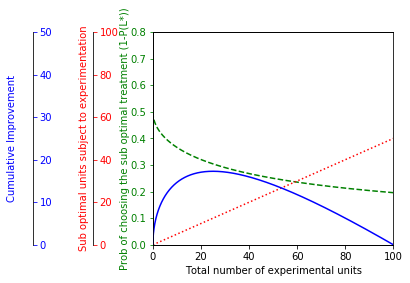

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# To make things reproducible...
np.random.seed(1977)

fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[1].spines['right'].set_position(('axes', -0.25))
axes[2].spines['right'].set_position(('axes', -0.5))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

# And finally we get to plot things...
colors = ('Green', 'Red', 'Blue')
type_graph = ('dashed','dotted','solid')
legend = ['Sub optimal units','(1-P(L*)','ECR']
intAxNo = 0
for ax, color in zip(axes, colors):
    intAxNo += 1
    ax.plot(d,T_hat[intAxNo-1], label = legend[intAxNo-1],linestyle = type_graph[intAxNo-1],  color=color)
    if (intAxNo > 1):
        if (intAxNo == 2):
            ax.set_ylabel('Sub optimal units subject to experimentation' , color=color, labelpad = -40 )
        elif (intAxNo == 3):
            ax.set_ylabel('Cumulative Improvement', color=color, labelpad = -45 )
        ax.get_yaxis().set_tick_params(direction='out')
    else:
        ax.set_ylabel('Prob of choosing the sub optimal treatment (1-P(L*))',color=color, labelpad = +0 )

    ax.tick_params(axis='y', colors=color)
axes[0].set_xlabel('Total number of experimental units')
axes[0].set_xlim(0, 100)
axes[1].set_ylim(0,100)
axes[2].set_ylim(0,50)
axes[-3].set_ylim(0,0.8)



plt.tight_layout()

plt.show()